In [3]:
file = open("1el3_out/1el3_info.txt")

In [50]:
import pandas as pd
import re

def parse_fpocket_info(file_path):
    pockets = []
    pocket_data = {}
    
    with open(file_path, 'r') as f:
        for line in f:
            line = line.strip()

            if line.startswith("Pocket"):  # Start of a new pocket
                if pocket_data:  # Save the previous pocket
                    pockets.append(pocket_data)
                pocket_data = {"Pocket": int(re.search(r'\d+', line).group())}
            elif "Volume" in line:
                pocket_data["Volume"] = float(re.search(r'[-+]?[0-9]*\.?[0-9]+', line).group())
            elif "Polarity" in line:
                pocket_data["Polarity"] = float(re.search(r'[-+]?[0-9]*\.?[0-9]+', line).group())
            elif "Hydrophobicity" in line:
                pocket_data["Hydrophobicity"] = float(re.search(r'[-+]?[0-9]*\.?[0-9]+', line).group())
            elif "Hydrophobicity" in line:
                pocket_data["Hydrophobicity"] = float(re.search(r'[-+]?[0-9]*\.?[0-9]+', line).group())
            elif "Druggability Score" in line:
                pocket_data["D score"] = float(re.search(r'[-+]?[0-9]*\.?[0-9]+', line).group())
            elif "Total SASA" in line:
                pocket_data["SASA"] = float(re.search(r'[-+]?[0-9]*\.?[0-9]+', line).group())
    
    if pocket_data:  # Add the last pocket
        pockets.append(pocket_data)
    
    return pd.DataFrame(pockets)

# Example usage
file_path = "1el3_out/1el3_info.txt"
pocket_df = parse_fpocket_info(file_path)
print(pocket_df)

    Pocket  D score     SASA  Volume  Hydrophobicity  Polarity
0        1    0.988  233.087   4.417          24.396      31.0
1        2    0.005   35.821   4.667          25.667       6.0
2        3    0.000   54.062   4.000          -6.714       6.0
3        4    0.003   71.895   3.714          26.571       3.0
4        5    0.000   61.938   4.714         -14.571       6.0
5        6    0.001   82.887   3.750           8.083       4.0
6        7    0.010  164.629   3.917          19.667       6.0
7        8    0.001   63.290   4.571          52.286       2.0
8        9    0.000   39.430   4.429          15.143       4.0
9       10    0.000   97.631   4.600           1.500       6.0
10      11    0.001  108.160   4.222          34.111       4.0
11      12    0.002  120.413   4.556          20.778       4.0
12      13    0.000   57.112   5.167          29.000       3.0
13      14    0.000   54.584   5.000          15.333       4.0
14      15    0.000  153.015   4.615          16.231   

In [48]:
import matplotlib.pyplot as plt
def plot_top_pockets(df, top_n=5):


    bar_width = 0.5
    top_pockets = df.sort_values(by="Volume", ascending=False).head(top_n)
    pocket_labels = [f"Pocket {top_pockets['Pocket'].iloc[i]}" for i in range(len(top_pockets))]
    fig, axes = plt.subplots(1, 3, figsize=(15, 5))
    
    axes[0].bar(pocket_labels, top_pockets["Volume"], color='blue', width = bar_width)
    axes[0].set_title("Top 8 Pockets by Volume")
    axes[0].set_xlabel("Pocket ID")
    axes[0].set_ylabel("Volume (Å³)")
    
    top_pockets = df.sort_values(by="Polarity", ascending=False).head(top_n)
    pocket_labels = [f"Pocket {top_pockets['Pocket'].iloc[i]}" for i in range(len(top_pockets))]
    axes[1].bar(pocket_labels, top_pockets["Polarity"], color='green', width = bar_width)
    axes[1].set_title("Top 8 Pockets by Polarity")
    axes[1].set_xlabel("Pocket ID")
    axes[1].set_ylabel("Polarity (%)")

    
    top_pockets = df.sort_values(by="Hydrophobicity", ascending=False).head(top_n)
    pocket_labels = [f"Pocket {top_pockets['Pocket'].iloc[i]}" for i in range(len(top_pockets))]
    axes[2].bar(pocket_labels,top_pockets["Hydrophobicity"], color='red', width = bar_width)
    axes[2].set_title("Top 8 Pockets by Hydrophobicity")
    axes[2].set_xlabel("Pocket ID")
    axes[2].set_ylabel("Hydrophobicity (%)")
    
    
    for ax in axes:
        ax.tick_params(axis='x', rotation=45)
    
    plt.tight_layout()
    plt.show()

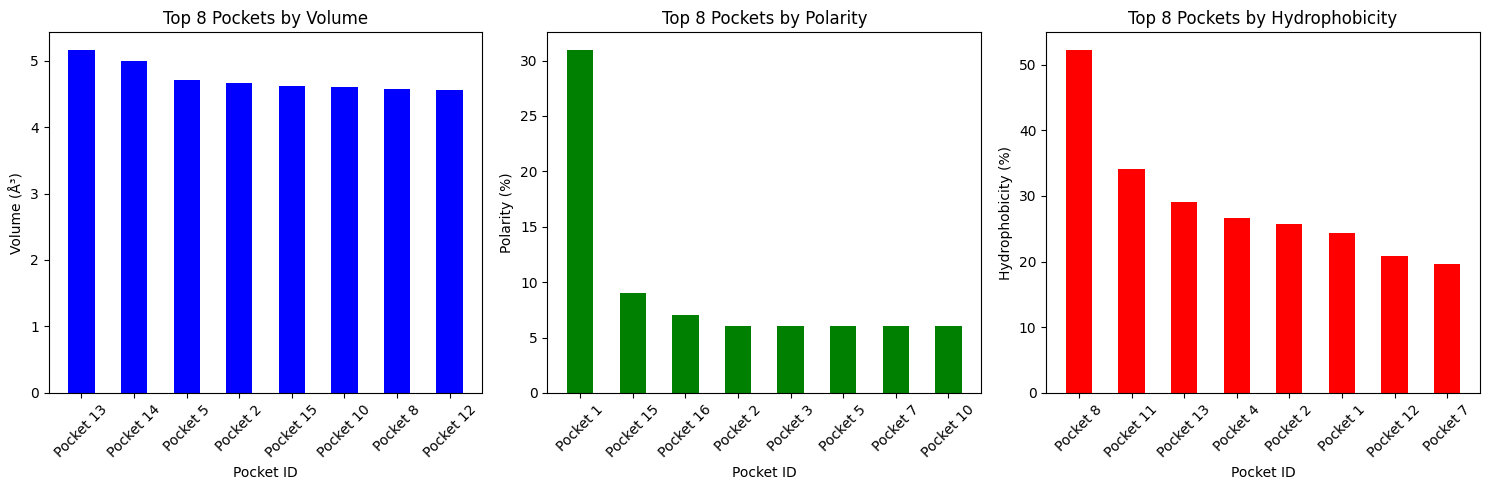

In [49]:
plot_top_pockets(pocket_df, top_n=8)


In [53]:
import matplotlib.pyplot as plt
def plot_top_pockets(df, top_n=5):


    bar_width = 0.5
    top_pockets = df.sort_values(by="SASA", ascending=False).head(top_n)
    pocket_labels = [f"Pocket {top_pockets['Pocket'].iloc[i]}" for i in range(len(top_pockets))]
    fig, axes = plt.subplots(1, 2, figsize=(10, 5))
    
    axes[0].bar(pocket_labels, top_pockets["SASA"], color='blue', width = bar_width)
    axes[0].set_title("Top Pockets by SASA")
    axes[0].set_xlabel("Pocket ID")
    axes[0].set_ylabel("SASA")
    





    top_pockets = df.sort_values(by="D score", ascending=False).head(top_n)
    pocket_labels = [f"Pocket {top_pockets['Pocket'].iloc[i]}" for i in range(len(top_pockets))]
    axes[1].bar(pocket_labels,top_pockets["D score"], color='yellow', width = bar_width)
    axes[1].set_title("Top Pockets by Druggability")
    axes[1].set_xlabel("Pocket ID")
    axes[1].set_ylabel("Druggability score")
    
    for ax in axes:
        ax.tick_params(axis='x', rotation=45)
    
    plt.tight_layout()
    plt.show()

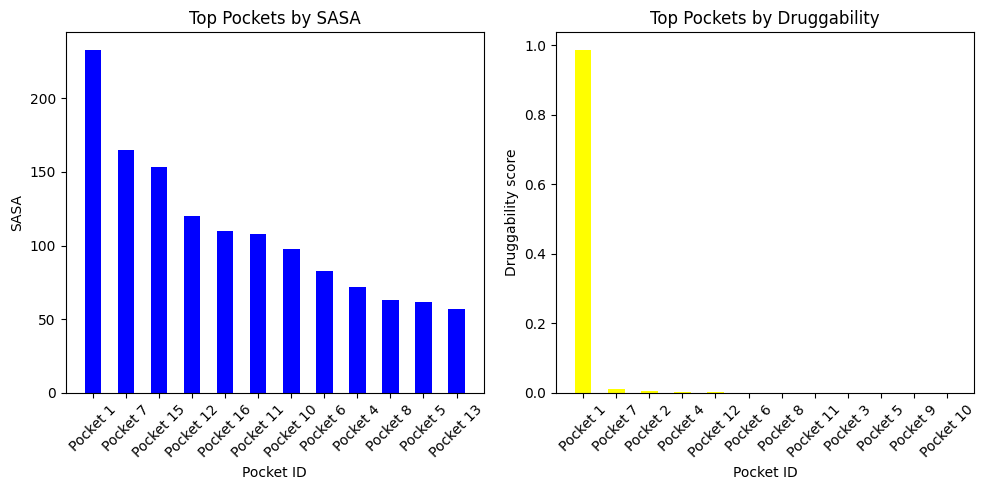

In [55]:
plot_top_pockets(pocket_df, top_n=12)